# Exploring Ford Go bike in February Dataset
## by Amr Mohamed Abuelfadl

## Preliminary Wrangling

> This data set includes information such as date, duration spent, locations and general information about each user for each ride made
in a bike-sharing system covering the greater San Francisco
Bay area in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# Loading Dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Dataset Shape
df.shape

(183412, 16)

In [4]:
# Dataset Features
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [5]:
# Exploring Dataset
df.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [6]:
# Checking number of null values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# Checking number of duplicates
df.duplicated().any()

False

In [8]:
# Exploring numerical values
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [9]:
# Since we are not interested in station names and ids
# We will drop only rows which have null values in birth year and gender as they represent only 4.5% from the dataset 
rows = df['member_birth_year'].isnull() | df['member_gender'].isnull()
indexes = df[rows].index
df.drop(indexes,inplace=True)
df.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           195
start_station_name         195
start_station_latitude       0
start_station_longitude      0
end_station_id             195
end_station_name           195
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
dtype: int64

In [10]:
# Keep only the columns we are interested in
col = ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']
df = df[col]
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id', 'bike_id',
       'user_type', 'member_birth_year', 'member_gender',
       'bike_share_for_all_trip'],
      dtype='object')

In [11]:
# Converting duration into minutes
df['duration_min'] = df['duration_sec'] // 60
df['duration_min'].head(10)

0      869
2     1030
3      608
4       26
5       29
6       19
7       26
8       26
9       17
10       7
Name: duration_min, dtype: int64

In [12]:
# Convert start_time column into datetime datatype
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [13]:
# Add new column day of the week, month, hour
df['day'] = df['start_time'].dt.day_name()
df['hour'] = pd.DatetimeIndex(df['start_time']).hour

In [14]:
# Add a new column Age of the rider
df['age'] = 2021 - df['member_birth_year']

### What is the structure of your dataset?

> The dataset contains 183412 and 16 columns. The dataset holds information about the duration of the ride in terms of the start datetime and endtime. As well as, info about the locations where the ride started or ended up, and finally, info regarding the rider in terms of date of birth, gender and user type. I have added also additional features such as day of the week and the hour of the start time, in addition to the age of the rider.
### What is/are the main feature(s) of interest in your dataset?

> I am more interested in the information related to the time of the ride such as hour and day, and the information related to the rider such as user type, age and gender.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> My interest is in investigating each type of rider what time or date they prefer to rider, and the aforementioned features will aid me to acheive good results related to my question.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### 1. Investigating the newly added column Duration min

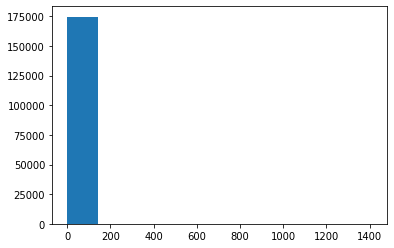

In [15]:
# Plotting column distribution
plt.hist(df['duration_min']);

In [16]:
# Exploring Column distribution
df['duration_min'].describe(percentiles=[.99])

count    175147.000000
mean         11.244971
std          27.361348
min           1.000000
50%           8.000000
99%          52.000000
max        1409.000000
Name: duration_min, dtype: float64

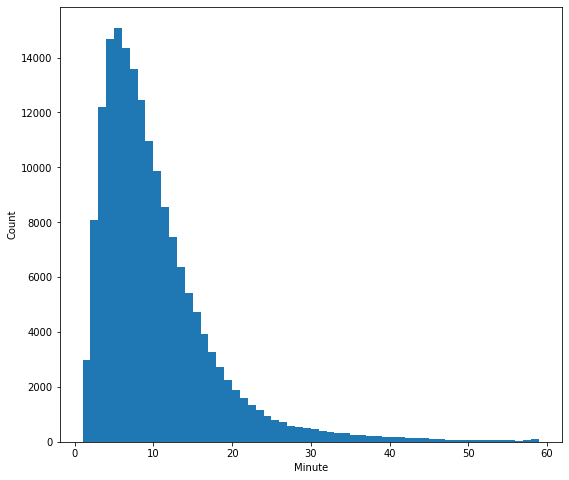

In [17]:
# Plotting column distribution without outliers
bins = np.arange(1, 60, 1)
plt.figure(figsize=(9,8))
plt.hist(df['duration_min'], bins=bins);
plt.xlabel('Minute');
plt.ylabel('Count');

#### We have defined the parameter percentiles in the describe method to understand the distribution of the values. We have found that 99% of the values are not exceeding 52 minutes so any value above 60 minutes will be considered as an outlier as we want to focus more on the common cases.

### 2. Investigating the newly added column Day of the week

In [18]:
# Checking column values
df['day'].unique()

array(['Thursday', 'Wednesday', 'Tuesday', 'Monday', 'Sunday', 'Saturday',
       'Friday'], dtype=object)

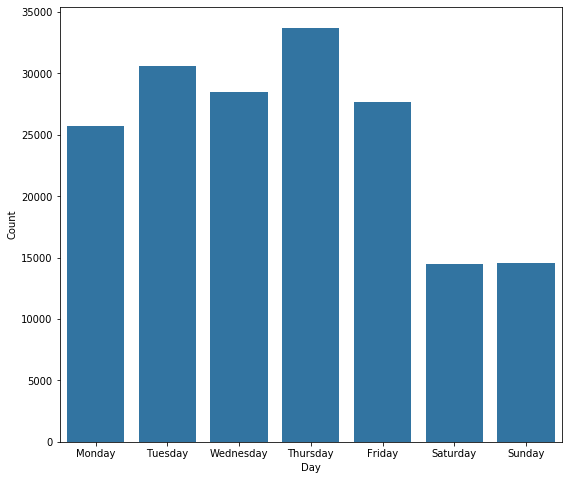

In [19]:
# Plotting days of the week for the rides
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_ordered = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['day'] = df['day'].astype(days_ordered)
plt.figure(figsize=(9,8))
color=sb.color_palette()[0]
sb.countplot(data=df, x='day', color=color)
plt.xlabel('Day');
plt.ylabel('Count');

#### The distribution of the days were mostly in working days. However, the least rides were taken during the weekends.

### 3. Investigating the newly added column Hour

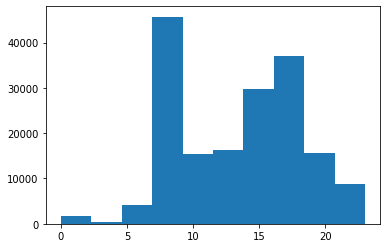

In [20]:
# Plotting column distribution
plt.hist(df['hour']);

In [21]:
# Exploring Column distribution
df['hour'].describe()

count    175147.000000
mean         13.456297
std           4.733351
min           0.000000
25%           9.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: hour, dtype: float64

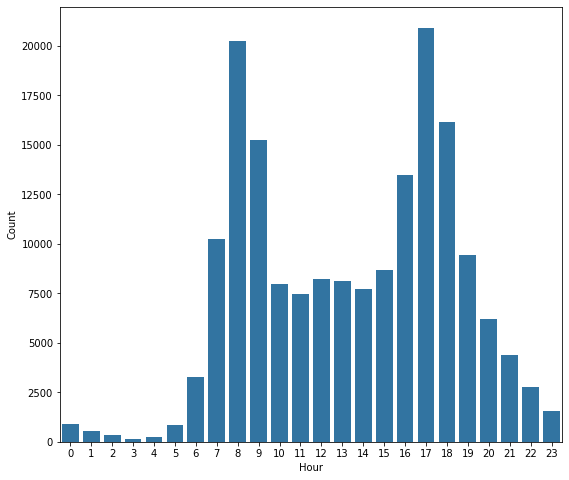

In [22]:
# Plotting days of the week for the rides
ticks = np.arange(0, 24, 1)
plt.figure(figsize=(9,8))
color=sb.color_palette()[0]
sb.countplot(data=df, x='hour', color=color);
plt.xticks(ticks);
plt.xlabel('Hour');
plt.ylabel('Count');

#### From the above figure we can say that most people take rides on 8 am and 6 pm which correspond to the work timing for most of people.

### 4. Investigating the User Type column

In [23]:
# Checking column values
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

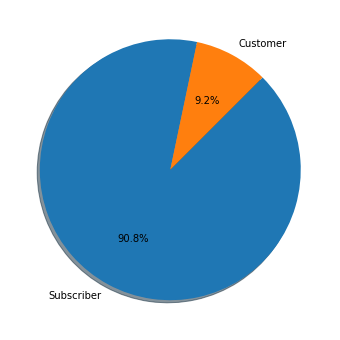

In [56]:
# Plotting distribution
count_values = df['user_type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(count_values, labels=count_values.index, startangle = 45, counterclock = False, autopct='%1.1f%%', shadow=True);

#### The above figure shows that most of the riders are Subscribers. 

### 5. Investigating Member Gender column

In [25]:
# Checking column values
df['member_gender'].unique()

array(['Male', 'Other', 'Female'], dtype=object)

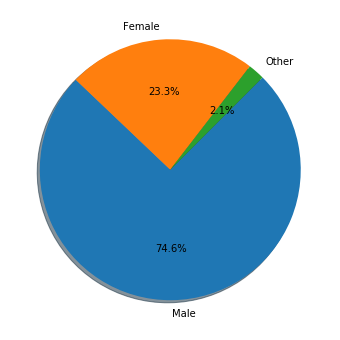

In [57]:
# Plotting distribution
count_values = df['member_gender'].value_counts()
total = count_values[0] + count_values[1] + count_values[2]
plt.figure(figsize=(6,6))
plt.pie(count_values, labels=count_values.index, startangle = 45, counterclock = False, autopct='%1.1f%%', shadow=True);

#### The above figure shows that most of the riders are males.

### 6. Investigating Age column

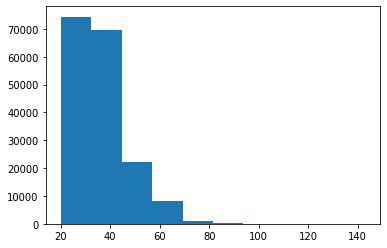

In [27]:
# Plotting column distribution
plt.hist(df['age']);

In [28]:
# Exploring Column distribution
df['age'].describe(percentiles=[.99])

count    175147.000000
mean         36.193563
std          10.116689
min          20.000000
50%          34.000000
99%          66.000000
max         143.000000
Name: age, dtype: float64

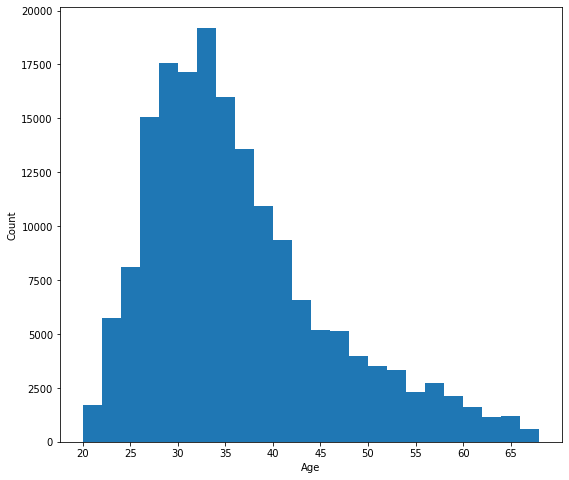

In [29]:
# Plotting column distribution without outliers
bins = np.arange(20, 70, 2)
plt.figure(figsize=(9,8))
plt.hist(df['age'], bins=bins);
ticks = np.arange(20, 70, 5)
plt.xticks(ticks)
plt.xlabel('Age');
plt.ylabel('Count');

#### We have defined the parameter percentiles in the describe method to understand the distribution of the values. We have found that 99% of the values are not exceeding the age of 66 so any value above 66 will be considered as an outlier as we want to focus more on the common cases. Most of the riders were between 25 and 35.

In [30]:
# Now we will filter the outliers in duration_min and age columns
df = df[(df['duration_min'] <= 60) & (df['age'] <= 70)]

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most of the rides spent less than 60 minutes, and the distribution of the days were mostly in working days. However, the least rides were taken during the weekends.¶In addition, most people take rides on 8 am and 6 pm which coreespond to the work timing for most of people. Furthermore, riders are mostly males and subscribers. We have found that 99% of the values are not exceeding the age of 66 and most of the riders were between 25 and 35.¶ The unusual points were in duration in minutes and age columns. No transformations were needed.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There was unusual distribution in the duration columnthe maximum value was 1409 and 99% of the data were less than 55 minutes. Also in the age column tha maximum value was 143 and 99% of the data were below 66. I have used describe column to understand column distribution and histograms and then I have updated the dataframe using a qury which excludes the mentioned outliers. This was done to work only on the common cases and achieve better results waithout the outliers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### 1. Investigating Gender and Age Columns

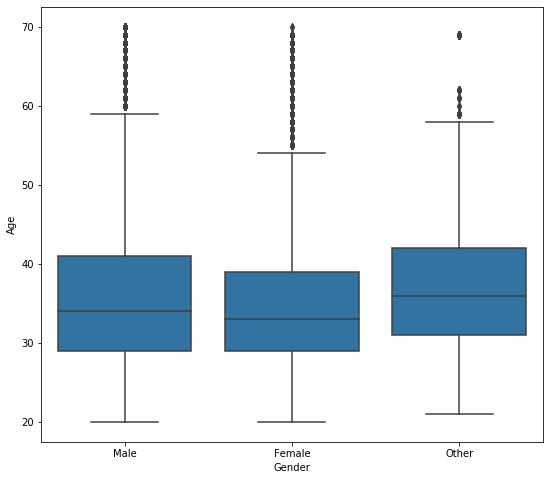

In [31]:
# Plotting relationship
color = sb.color_palette()[0]
plt.figure(figsize=(9,8))
sb.boxplot(data=df, x='member_gender', y='age', color=color)
plt.xlabel('Gender');
plt.ylabel('Age');

#### We can find that the median age value in males is slightly hiher than females, as well as, the range in values or spread of age values is  more wider in males.

### 2. Investigating Duration and User Type Columns

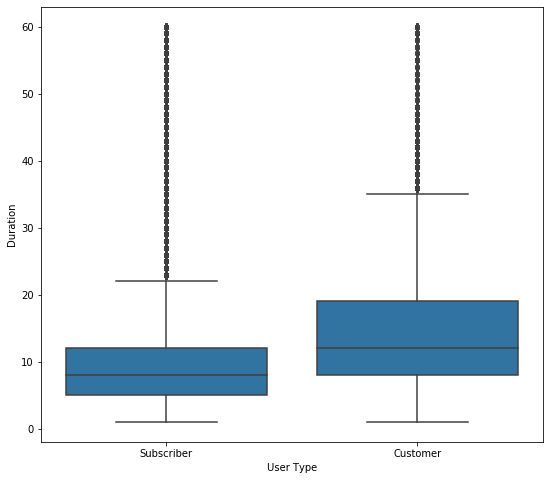

In [32]:
# Plotting relationship
color = sb.color_palette()[0]
plt.figure(figsize=(9,8))
sb.boxplot(data=df, x='user_type', y='duration_min', color=color)
plt.xlabel('User Type');
plt.ylabel('Duration');

#### We can find that customers spend more time in the ride than subscribers.

### 3. Investigating Hour and Day Columns¶

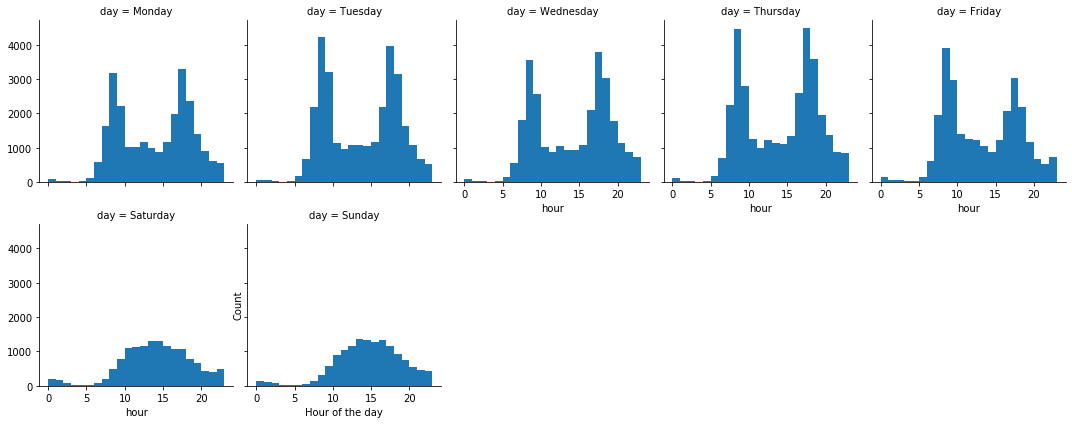

In [33]:
# Convert the "Day" column from a plain object type into an ordered categorical type
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_ordered = pd.api.types.CategoricalDtype(ordered=True, categories=days)
df['day'] = df['day'].astype(days_ordered)

# Plot the Seaborn's FacetGrid
bins = np.arange(0,24,1)
g = sb.FacetGrid(data = df, col = 'day', col_wrap= 5)
g.map(plt.hist, "hour", bins= bins);
plt.xlabel('Hour of the day');
plt.ylabel('Count');

#### We can find that from Monday to Friday the distribution of the values are almost the same , due that these are working days and mainly people take rides in the early morning to go to their work, as well as, reverve rides afternoon to go back home after work. However, in Saturday and Sunday which are weekends, people mainly take rides at 15 pm.

### 4. Investigating Hour and Duration Columns

In [34]:
# Investigating column values
df['duration_min'].describe()

count    172955.000000
mean          9.835865
std           7.443790
min           1.000000
25%           5.000000
50%           8.000000
75%          13.000000
max          60.000000
Name: duration_min, dtype: float64

Text(0, 0.5, 'Duration')

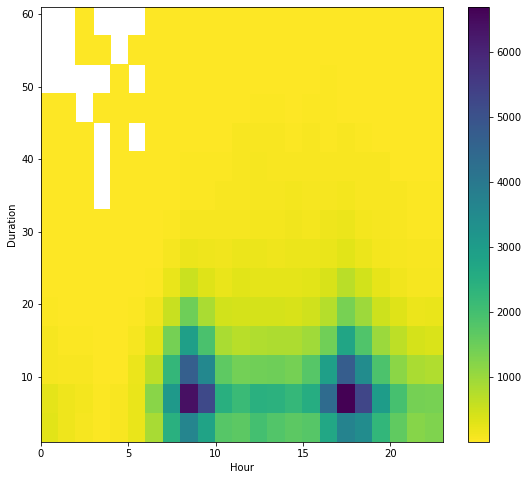

In [35]:
# Plotting
bins_x = np.arange(0, 24, 1)
bins_y = np.arange(1, 62, 4)
plt.figure(figsize=(9,8))
plt.hist2d(data = df, x = 'hour', y = 'duration_min', cmin=1, cmap='viridis_r', bins=[bins_x,bins_y])
plt.colorbar()
plt.xlabel('Hour')
plt.ylabel('Duration')

#### We can find that most rides are taken at 8 am and 18 pm for a ride that does not exceed 10 mins.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We found that the median age value in males is slightly higher than females, as well as, the range in values or spread of age values is more wider in males. In addition, another finding is that customers spend more time in the ride than subscribers, this may be due to that subscribers take rides for certain daily missions that don't consume a lot of time. Furthermore, We found that start time from Monday to Friday are almost distributed the same , due that these are working days and mainly people take rides in the early morning to go to their work, as well as, reverve rides afternoon to go back home after work. However, in Saturday and Sunday which are weekends, people mainly take rides at 15 pm. Finally, another finding is that rides are almost taken at 8 am and 18 pm for a ride that does not exceed 10 mins, which means that people use bikes as the distance between their work and home is short.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> No

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### 1. Investigating hour, duration & day columns
#### Q. How does the average ride duration vary for each hour in weekdays ?

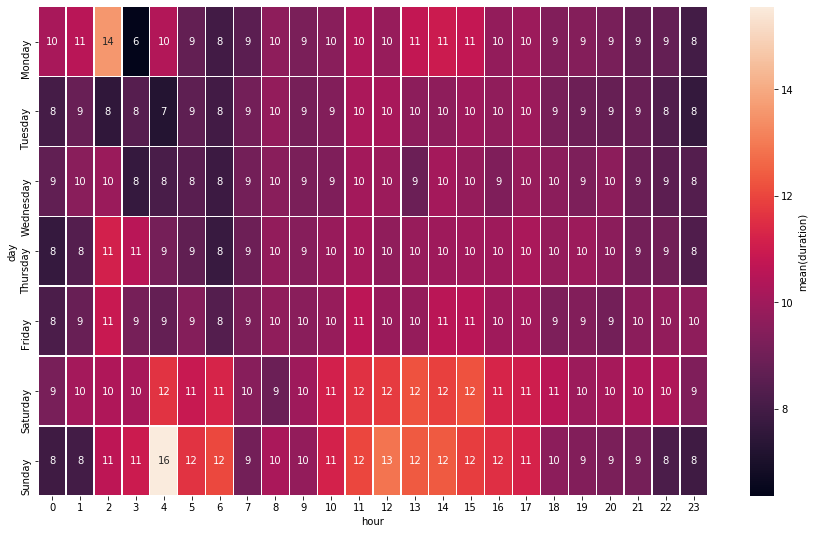

In [36]:
# Plotting
duration_means = df.groupby(['day', 'hour']).mean()['duration_min']
duration_means = duration_means.reset_index(name = 'duration_min_avg')
duration_means = duration_means.pivot(index = 'day', columns = 'hour',values = 'duration_min_avg')
plt.figure(figsize=(15,9))
sb.heatmap(duration_means, fmt = '.0f',cbar_kws = {'label' : 'mean(duration)'}, annot=True,linewidths=.3)

#### We found that the average duration is almost the same for all hours in weekdays except in Sunday at 4 pm.

### 2. Investigating gender, user type & age columns
#### Q. What is the average user type age for each gender ? 

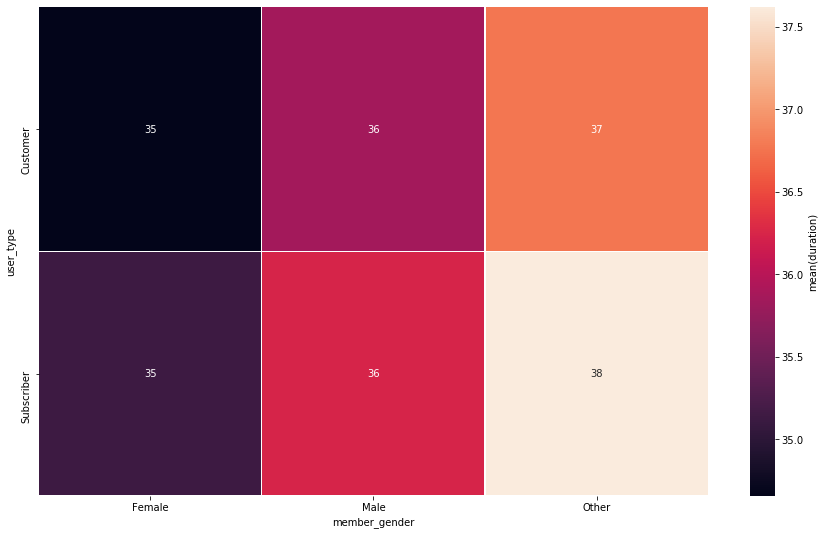

In [58]:
# Plotting
duration_means = df.groupby(['member_gender', 'user_type']).mean()['age']
duration_means = duration_means.reset_index(name = 'age_avg')
duration_means = duration_means.pivot(index = 'user_type', columns = 'member_gender',values = 'age_avg')
plt.figure(figsize=(15,9))
sb.heatmap(duration_means, fmt = '.0f',cbar_kws = {'label' : 'mean(Age)'}, annot=True,linewidths=.3)

#### We can find that the average user type age for each gender is between 35 and 38.

### 3. Investigating day, duration & user type columns 
#### Q. how the average duration for rides change in each day between customer and subscriber ? 

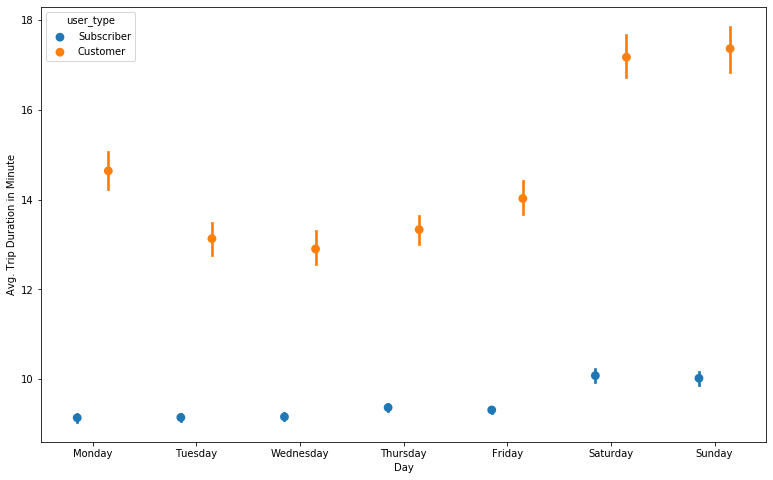

In [55]:
# Plotting
plt.figure(figsize=(13,8))
sb.pointplot(data=df, x='day', y='duration_min', hue='user_type', dodge=0.3, linestyles="");
plt.xlabel('Day');
plt.ylabel('Avg. Trip Duration in Minute');

#### We can find here that customers spend more duration all over the week than subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Relationships in multivariate exploration were very insightful, as we discover more solid patterns in one visualization. To start with, We found that the average duration spent is almost the same for all hours in weekdays except in Sunday at 4 pm which was the peak, due to people may prefer to take some city tours in their day off. Moreover, We found that for all user types the average age is almost the same for all genders between 35 and 38. Finally, we explored more the time spent by each user type all over the week and we found customers spend more time all over the week than subscribers. Due to the fact that subscribers user more their rides for certain missions such as going to their work and go back from work to home.

### Were there any interesting or surprising interactions between features?

> Nothing was massively surprising, however, the average time spent by customers for all days of the week was higher than subscribers.